In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

Общий вид краевой задачи:

$k * u_{xx} + p * u_x + q * u = f$

Общий вид граничных условий:

 $\alpha_0 * y_0(a) + \alpha_1 * y'_0(a) = A_p$
 
 $\beta_0 * y_n(b) + \beta_1 * y'_n(b) = B_p$
 

n=1: $-u'' + x^2 * u = (pi^2 / 4 + x^2) * cos(pi * x / 2)    u(0) = 1, u(1) = 0$ (пример из Амосова)


n=2: $-1 / (x+3) * u''- x * u' + ln(2 + x) * u = 1 - x / 2    u′(−1) = u′(1) + 1 / 2 * u(1) = 0$  (5 вариант из Пакулиной)


n=3: $((x - 2) / (x + 2)) * u'' + x * u' + (1 - sin(x)) * u = x^2    u(-1) = u(1) = 0$  (6 вариант из Пакулиной)

Для каждого из коэфициентов создадим функцию, которая будет возвращать по заданному n, те значения, которые заданы в условиях выше. Название каждой функции соответствует коэфициенту.

In [2]:
def k(x):
    if n == 1:
        return -1
    if n == 2:
        return -1 / (x + 3)
    if n == 3:
        return (x - 2) / (x + 2)


def p(x):
    if n == 1:
        return 0
    if n == 2:
        return -x
    if n == 3:
        return x


def q(x):
    if n == 1:
        return x ** 2
    if n == 2:
        return math.log(2 + x)
    if n == 3:
        return 1 - math.sin(x)


def f(x):
    if n == 1:
        return (math.pi ** 2 / 4 + x ** 2) * math.cos(math.pi * x / 2)
    if n == 2:
        return 1 - x / 2
    if n == 3:
        return x * x


def a():
    if n == 1:
        return 0
    if n == 2:
        return -1
    if n == 3:
        return -1


def b():
    if n == 1:
        return 1
    if n == 2:
        return 1
    if n == 3:
        return 1


def A_p():
    if n == 1:
        return 1
    if n == 2:
        return 0
    if n == 3:
        return 0


def B_p():
    if n == 1:
        return 0
    if n == 2:
        return 0
    if n == 3:
        return 0


def alpha0():
    if n == 1:
        return 1
    if n == 2:
        return 0
    if n == 3:
        return 1


def alpha1():
    if n == 1:
        return 0
    if n == 2:
        return 1
    if n == 3:
        return 0


def beta0():
    if n == 1:
        return 1
    if n == 2:
        return 1 / 2
    if n == 3:
        return 1


def beta1():
    if n == 1:
        return 0
    if n == 2:
        return 1
    if n == 3:
        return 0

Найдём коэффициенты по формулам

In [3]:
def find_coef(a, b, alpha0, alpha1, beta0, beta1, A_c, B_c, h):
    n = round((b - a) / h)
    x = np.zeros(n + 1, dtype=float)
    for i in range(n + 1):
        x[i] = a + i * h
    A = np.zeros(n + 1, dtype=float)
    B = np.zeros(n + 1, dtype=float)
    C = np.zeros(n + 1, dtype=float)
    D = np.zeros(n + 1, dtype=float)
    A[0] = 0
    A[n] = -beta1
    B[0] = h * alpha0 - alpha1
    B[n] = h * beta0 + beta1
    C[0] = alpha1
    C[n] = 0
    D[0] = h * A_c
    D[n] = h * B_c
    for i in range(1, n):
        A[i] = 2 * k(x[i]) - h * p(x[i])
        B[i] = -4 * k(x[i]) + 2 * h * h * q(x[i])
        C[i] = 2 * k(x[i]) + h * p(x[i])
        D[i] = 2 * h * h * f(x[i])
    return A, B, C, D

Находим решение

In [4]:
def find_solution(a, b, alpha0, alpha1, beta0, beta1, A_c, B_c, h):
    n = round((b - a) / h)
    A, B, C, D = find_coef(a, b, alpha0, alpha1, beta0, beta1, A_c, B_c, h)
    s = np.zeros(n + 1, dtype=float)
    t = np.zeros(n + 1, dtype=float)
    y = np.zeros(n + 1, dtype=float)
    s[0] = - C[0] / B[0]
    t[0] = D[0] / B[0]
    for i in range(1, n + 1):
        s[i] = -C[i] / (A[i] * s[i - 1] + B[i])
        t[i] = (D[i] - A[i] * t[i - 1]) / (A[i] * s[i - 1] + B[i])
    y[n] = t[n]
    for i in range(n - 1, -1, -1):
        y[i] = s[i] * y[i + 1] + t[i]
    return y

Для контроля точности используем метод сгущения сетки

In [5]:
def grid(a, b, alpha0, alpha1, beta0, beta1, A_c, B_c, h, eps):
    coef = 2
    k = 0
    v2 = find_solution(a, b, alpha0, alpha1, beta0, beta1, A_c, B_c, h)
    while True:
        k += 1
        v1 = v2
        v2 = find_solution(a, b, alpha0, alpha1, beta0, beta1, A_c, B_c, h / (coef ** k))
        err = np.zeros(v1.shape[0], dtype=float)
        for i in range(v1.shape[0]):
            err[i] = (v2[i * 2] - v1[i]) / (coef ** 1 - 1)
        if np.linalg.norm(err) < eps:
            for i in range(n + 1):
                if i % 2 == 0:
                    v2[i * 2] += err[i]
                else:
                    v2[i] += (err[i - 1] + err[i + 1]) / 2
            x = np.zeros(v2.shape[0], dtype=float)
            for i in range(v2.shape[0]):
                x[i] = a + i * h / (coef ** k)
            return x, v2, h / (coef ** k), k




Рисуем картинки

Погрешность 0.0001
Шаг конечной сетки = 0.00390625
Количество шагов сгущения сетки: 5


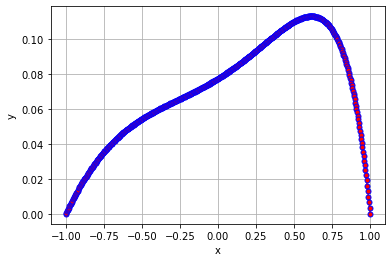

In [6]:
n = 3
h = 1/8
eps = 1e-4
x, y, h_new, k = grid(a(), b(), alpha0(), alpha1(), beta0(), beta1(), A_p(), B_p(), h, eps)
print("Погрешность", eps)
print("Шаг конечной сетки =", h_new)
print("Количество шагов сгущения сетки:", k)
plt.plot(x, y, marker='.', color='red', mec='blue', ms=10)
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()
